<a href="https://colab.research.google.com/github/mrunalkute/DS-Machine-Learning-Assignments/blob/main/Lab5_Tree_Stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Trees and Model Stability

Trees are notorious for being **unstable**: Small changes in the data can lead to noticeable or large changes in the tree. We're going to explore this phenomenon, and a common rebuttal.

In the folder for this lab, there are three datasets that we used in class: Divorce, heart failure, and the AirBnB price dataset.

1. Pick one of the datasets and appropriately clean it.
2. Perform a train-test split for a specific seed (save the seed for reproducibility). Fit a classification/regression tree and a linear model on the training data and evaluate their performance on the test data. Set aside the predictions these models make.
3. Repeat step 2 for three to five different seeds (save the seeds for reproducibility). How different are the trees that you get? Your linear model coefficients?. Set aside the predictions these models make.

Typically, you would see the trees changing what appears to be a non-trivial amount, while the linear model coefficients don't vary nearly as much. Often, the changes appear substantial.

But are they?

4. Instead of focusing on the tree or model coefficients, do three things:
    1. Make scatterplots of the predicted values on the test set from question 2 against the predicted values for the alternative models from part 3, separately for your trees and linear models. Do they appear reasonably similar?
    2. Compute the correlation between your model in part 2 and your alternative models in part 3, separately for your trees and linear models. Are they highly correlated or not?
    3. Run a simple linear regression of the predicted values on the test set from the alternative models on the predicted values from question 2, separately for your trees and linear models. Is the intercept close to zero? Is the slope close to 1? Is the $R^2$ close to 1?

5. Do linear models appear to have similar coefficients and predictions across train/test splits? Do trees?
6. True or false, and explain: "Even if the models end up having a substantially different appearance, the predictions they generate are often very similar."

In [170]:
!git clone "https://github.com/mchen899923/L5-Tree-Stability.git"

fatal: destination path 'L5-Tree-Stability' already exists and is not an empty directory.


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Q1

In [172]:
divorce_df = pd.read_csv("L5-Tree-Stability/data/divorce/divorce_data.csv")
divorce_df.head()

,Q1;Q2;Q3;Q4;Q5;Q6;Q7;Q8;Q9;Q10;Q11;Q12;Q13;Q14;Q15;Q16;Q17;Q18;Q19;Q20;Q21;Q22;Q23;Q24;Q25;Q26;Q27;Q28;Q29;Q30;Q31;Q32;Q33;Q34;Q35;Q36;Q37;Q38;Q39;Q40;Q41;Q42;Q43;Q44;Q45;Q46;Q47;Q48;Q49;Q50;Q51;Q52;Q53;Q54;Divorce
0,2;2;4;1;0;0;0;0;0;0;1;0;1;1;0;1;0;0;0;1;0;0;0;...
1,4;4;4;4;4;0;0;4;4;4;4;3;4;0;4;4;4;4;3;2;1;1;0;...
2,2;2;2;2;1;3;2;1;1;2;3;4;2;3;3;3;3;3;3;2;1;0;1;...
3,3;2;3;2;3;3;3;3;3;3;4;3;3;4;3;3;3;3;3;4;1;1;1;...
4,2;2;1;1;1;1;0;0;0;0;0;1;0;1;1;1;1;1;2;1;1;0;0;...


In [173]:
#split into separate columns using str.split
divorce_split= divorce_df["Q1;Q2;Q3;Q4;Q5;Q6;Q7;Q8;Q9;Q10;Q11;Q12;Q13;Q14;Q15;Q16;Q17;Q18;Q19;Q20;Q21;Q22;Q23;Q24;Q25;Q26;Q27;Q28;Q29;Q30;Q31;Q32;Q33;Q34;Q35;Q36;Q37;Q38;Q39;Q40;Q41;Q42;Q43;Q44;Q45;Q46;Q47;Q48;Q49;Q50;Q51;Q52;Q53;Q54;Divorce"].str.split(";", expand=True)
divorce_split.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [174]:
divorce_split.isna()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
166,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [175]:
divorce_split.isna().any().any()

np.False_

In [176]:
divorce_split.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [177]:
#make the column start with 1 instead of 0
divorce_split.columns = range(1, len(divorce_split.columns) + 1)
divorce_split.head()

,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,55
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [178]:
#make the rows start with 1 instead of 0
divorce_split.index = range(1, len(divorce_split.index) + 1)
divorce_split.head()

,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,55
1,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
2,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
3,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
4,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
5,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


We decided to make the columns start with 1 instead of 0 because the questions are 1-55 and it does not make sense to have a "Question 0". We did the same for the rows

In [179]:
#Check the data types
divorce_split.info()
#they are all objects!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 1 to 170
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       170 non-null    object
 1   2       170 non-null    object
 2   3       170 non-null    object
 3   4       170 non-null    object
 4   5       170 non-null    object
 5   6       170 non-null    object
 6   7       170 non-null    object
 7   8       170 non-null    object
 8   9       170 non-null    object
 9   10      170 non-null    object
 10  11      170 non-null    object
 11  12      170 non-null    object
 12  13      170 non-null    object
 13  14      170 non-null    object
 14  15      170 non-null    object
 15  16      170 non-null    object
 16  17      170 non-null    object
 17  18      170 non-null    object
 18  19      170 non-null    object
 19  20      170 non-null    object
 20  21      170 non-null    object
 21  22      170 non-null    object
 22  23      170 non-null    ob

Q2

In [180]:
#import packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Set 'SEED' variable for reproducibility
SEED = 42

#Assuming the target variable is the last column and features are all other columns
X = divorce_split.iloc[:, :-1]  # All columns except the last one
y = divorce_split.iloc[:, -1]   # Last column as target

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

#fit classification/regression tree
tree_model = DecisionTreeClassifier(random_state=SEED)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

#fit our linear model
linear_model = LogisticRegression(random_state=SEED, max_iter=1000)
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

In [181]:
# Evaluate performance
print("\nClassification Report:")
print(classification_report(y_test, tree_predictions))
print(f"Accuracy: {accuracy_score(y_test, tree_predictions):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, tree_predictions))

#Linear model performance
print("\nClassification Report:")
print(classification_report(y_test, linear_predictions))
print(f"Accuracy: {accuracy_score(y_test, linear_predictions):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, linear_predictions))

#Save predictions for later use
predictions_dict = {
    'tree_predictions': tree_predictions,
    'linear_predictions': linear_predictions,
    'y_test': y_test,
    'X_test': X_test
}

print(f"\nSeed used: {SEED}")


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Accuracy: 0.9706

Confusion Matrix:
[[17  0]
 [ 1 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.88      0.94        17

    accuracy                           0.94        34
   macro avg       0.95      0.94      0.94        34
weighted avg       0.95      0.94      0.94        34

Accuracy: 0.9412

Confusion Matrix:
[[17  0]
 [ 2 15]]

Seed used: 42


Q3

In [182]:
#SEED 2: SEED = 123

#Set 'SEED' variable for reproducibility
SEED_2 = 123

#Assuming the target variable is the last column and features are all other columns
X = divorce_split.iloc[:, :-1]  # All columns except the last one
y = divorce_split.iloc[:, -1]   # Last column as target

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED_2, stratify=y
)

#fit classification/regression tree
tree_model2 = DecisionTreeClassifier(random_state=SEED_2)
tree_model2.fit(X_train, y_train)
tree_predictions2 = tree_model2.predict(X_test)

#fit our linear model
linear_model2 = LogisticRegression(random_state=SEED_2, max_iter=1000)
linear_model2.fit(X_train, y_train)
linear_predictions2 = linear_model2.predict(X_test)

In [183]:
#SEED 2: SEED = 123

#Evaluate performance
print("\nClassification Report:")
print(classification_report(y_test, tree_predictions2))
print(f"Accuracy: {accuracy_score(y_test, tree_predictions2):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, tree_predictions2))

#Linear model performance
print("\nClassification Report:")
print(classification_report(y_test, linear_predictions2))
print(f"Accuracy: {accuracy_score(y_test, linear_predictions2):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, linear_predictions2))

#Save predictions for later use
predictions_dict = {
    'tree_predictions': tree_predictions2,
    'linear_predictions': linear_predictions2,
    'y_test': y_test,
    'X_test': X_test
}

print(f"\nSeed used: {SEED_2}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        17

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

Accuracy: 1.0000

Confusion Matrix:
[[17  0]
 [ 0 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Accuracy: 0.9706

Confusion Matrix:
[[17  0]
 [ 1 16]]

Seed used: 123


In [184]:
#SEED 3: SEED = 0

#Set 'SEED' variable for reproducibility
SEED_3 = 0

#Assuming the target variable is the last column and features are all other columns
X = divorce_split.iloc[:, :-1]  # All columns except the last one
y = divorce_split.iloc[:, -1]   # Last column as target

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED_3, stratify=y
)

#fit classification/regression tree
tree_model3 = DecisionTreeClassifier(random_state=SEED_3)
tree_model3.fit(X_train, y_train)
tree_predictions3 = tree_model3.predict(X_test)

#fit our linear model
linear_model3 = LogisticRegression(random_state=SEED_3, max_iter=1000)
linear_model3.fit(X_train, y_train)
linear_predictions3 = linear_model3.predict(X_test)

In [185]:
#SEED 3: SEED = 0

#Evaluate performance
print("\nClassification Report:")
print(classification_report(y_test, tree_predictions3))
print(f"Accuracy: {accuracy_score(y_test, tree_predictions3):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, tree_predictions3))

#Linear model performance
print("\nClassification Report:")
print(classification_report(y_test, linear_predictions3))
print(f"Accuracy: {accuracy_score(y_test, linear_predictions3):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, linear_predictions3))

#Save predictions for later use
predictions_dict = {
    'tree_predictions': tree_predictions3,
    'linear_predictions': linear_predictions3,
    'y_test': y_test,
    'X_test': X_test
}

print(f"\nSeed used: {SEED_3}")


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Accuracy: 0.9706

Confusion Matrix:
[[17  0]
 [ 1 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Accuracy: 0.9706

Confusion Matrix:
[[17  0]
 [ 1 16]]

Seed used: 0


In [186]:
#SEED 4: SEED = 1234

#Set 'SEED' variable for reproducibility
SEED_4 = 1234

#Assuming the target variable is the last column and features are all other columns
X = divorce_split.iloc[:, :-1]  # All columns except the last one
y = divorce_split.iloc[:, -1]   # Last column as target

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED_4, stratify=y
)

#fit classification/regression tree
tree_model4 = DecisionTreeClassifier(random_state=SEED_4)
tree_model4.fit(X_train, y_train)
tree_predictions4 = tree_model4.predict(X_test)

#fit our linear model
linear_model4 = LogisticRegression(random_state=SEED_4, max_iter=1000)
linear_model4.fit(X_train, y_train)
linear_predictions4 = linear_model4.predict(X_test)

In [187]:
#SEED 4: SEED = 1234

#Evaluate performance
print("\nClassification Report:")
print(classification_report(y_test, tree_predictions4))
print(f"Accuracy: {accuracy_score(y_test, tree_predictions4):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, tree_predictions4))

#Linear model performance
print("\nClassification Report:")
print(classification_report(y_test, linear_predictions4))
print(f"Accuracy: {accuracy_score(y_test, linear_predictions4):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, linear_predictions4))

#Save predictions for later use
predictions_dict = {
    'tree_predictions': tree_predictions4,
    'linear_predictions': linear_predictions4,
    'y_test': y_test,
    'X_test': X_test
}

print(f"\nSeed used: {SEED_4}")


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Accuracy: 0.9706

Confusion Matrix:
[[17  0]
 [ 1 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Accuracy: 0.9706

Confusion Matrix:
[[17  0]
 [ 1 16]]

Seed used: 1234


In [188]:
#SEED 5: SEED = 7

#Set 'SEED' variable for reproducibility
SEED_5 = 7

#Assuming the target variable is the last column and features are all other columns
X = divorce_split.iloc[:, :-1]  # All columns except the last one
y = divorce_split.iloc[:, -1]   # Last column as target

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED_5, stratify=y
)

#fit classification/regression tree
tree_model5 = DecisionTreeClassifier(random_state=SEED_5)
tree_model5.fit(X_train, y_train)
tree_predictions5 = tree_model5.predict(X_test)

#fit our linear model
linear_model5 = LogisticRegression(random_state=SEED_5, max_iter=1000)
linear_model5.fit(X_train, y_train)
linear_predictions5 = linear_model5.predict(X_test)

In [189]:
#SEED 5: SEED = 7

#Evaluate performance
print("\nClassification Report:")
print(classification_report(y_test, tree_predictions5))
print(f"Accuracy: {accuracy_score(y_test, tree_predictions5):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, tree_predictions5))

#Linear model performance
print("\nClassification Report:")
print(classification_report(y_test, linear_predictions5))
print(f"Accuracy: {accuracy_score(y_test, linear_predictions5):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, linear_predictions5))

#Save predictions for later use
predictions_dict = {
    'tree_predictions': tree_predictions5,
    'linear_predictions': linear_predictions5,
    'y_test': y_test,
    'X_test': X_test
}

print(f"\nSeed used: {SEED_5}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.94      1.00      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Accuracy: 0.9706

Confusion Matrix:
[[16  1]
 [ 0 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Accuracy: 0.9706

Confusion Matrix:
[[17  0]
 [ 1 16]]

Seed used: 7


In [190]:
#Plot all of the trees to compare

#import packages
from sklearn.tree import plot_tree

#We need to compare our seeds we made
seeds_to_plot = [42, 123, 0, 1234, 7]


<Figure size 640x480 with 0 Axes>

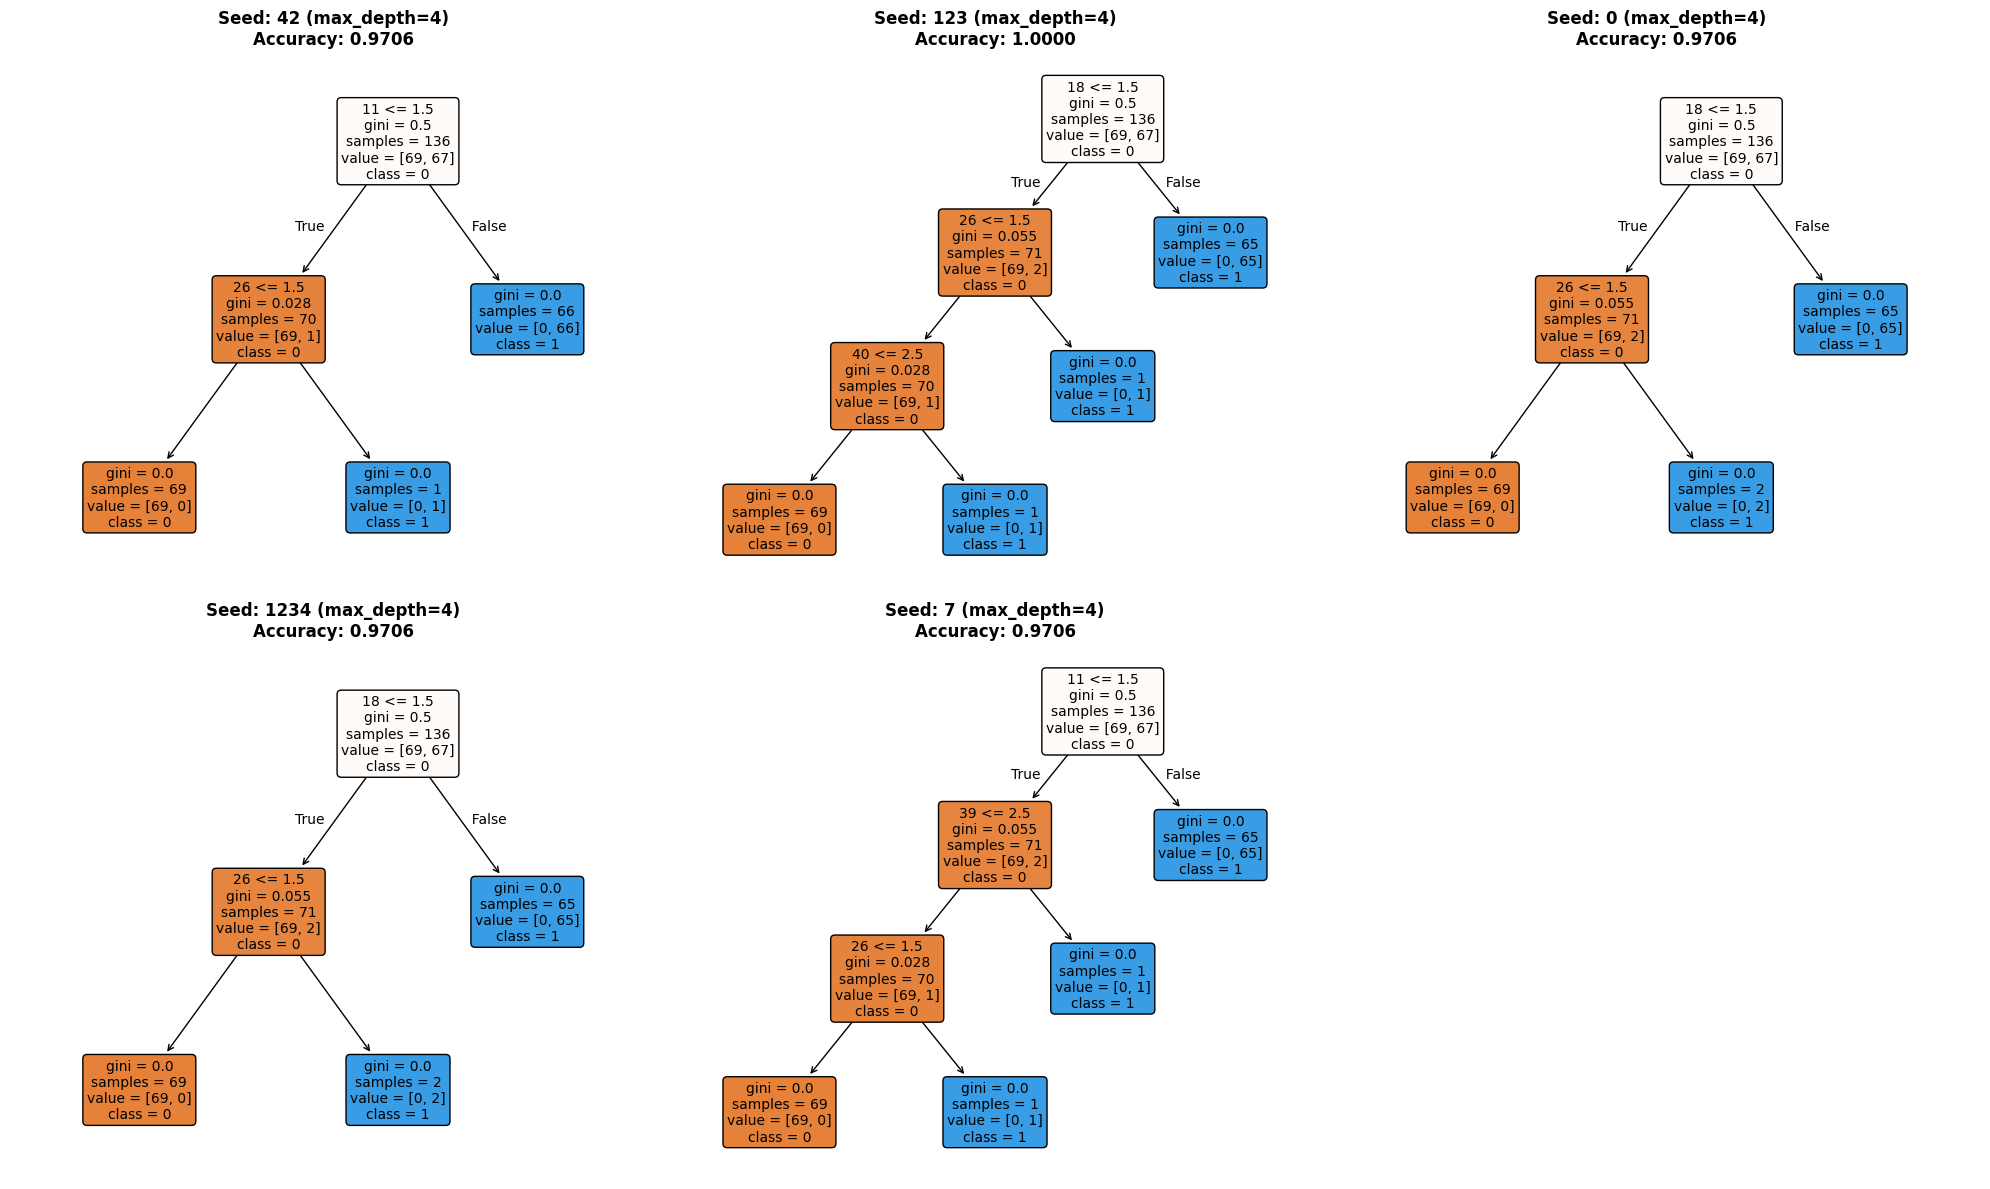

In [191]:
#Plot the trees
for idx, seed in enumerate(seeds_to_plot):
    #Train-test split with this seed
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    #fit Classification Tree
    tree_model = DecisionTreeClassifier(random_state=seed)
    tree_model.fit(X_train, y_train)

    #calculate accuracy
    tree_preds = tree_model.predict(X_test)
    tree_acc = accuracy_score(y_test, tree_preds)

    # Plot tree
    plot_tree(tree_model,
              ax=axes[idx],
              feature_names=X.columns if hasattr(X, 'columns') else None,
              class_names=['0', '1'],
              filled=True,
              rounded=True,
              fontsize=8)

    axes[idx].set_title(f'Seed: {seed}\nDepth: {tree_model.get_depth()}, '
                        f'Leaves: {tree_model.get_n_leaves()}, '
                        f'Accuracy: {tree_acc:.4f}',
                        fontsize=12, fontweight='bold')

# Remove the extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig('decision_trees_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Alternative: Plot with max_depth constraint for better visibility
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, seed in enumerate(seeds_to_plot):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    # Fit tree with max_depth for visualization
    tree_model = DecisionTreeClassifier(random_state=seed, max_depth=4)
    tree_model.fit(X_train, y_train)
    tree_acc = accuracy_score(y_test, tree_model.predict(X_test))

    plot_tree(tree_model,
              ax=axes[idx],
              feature_names=X.columns if hasattr(X, 'columns') else None,
              class_names=['0', '1'],
              filled=True,
              rounded=True,
              fontsize=10)

    axes[idx].set_title(f'Seed: {seed} (max_depth=4)\nAccuracy: {tree_acc:.4f}',
                        fontsize=12, fontweight='bold')

axes[-1].axis('off')
plt.tight_layout()
plt.savefig('decision_trees_limited_depth.png', dpi=300, bbox_inches='tight')
plt.show()


In [192]:
# Print detailed statistics for each seed
print("Tree Comparisons")
for seed in seeds_to_plot:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    tree_model = DecisionTreeClassifier(random_state=seed)
    tree_model.fit(X_train, y_train)
    tree_preds = tree_model.predict(X_test)
    tree_acc = accuracy_score(y_test, tree_preds)

    print(f"\nSeed {seed}:")
    print(f"  Depth: {tree_model.get_depth()}")
    print(f"  Leaves: {tree_model.get_n_leaves()}")
    print(f"  Accuracy: {tree_acc:.4f}")
    print(f"  Top 3 Important Features:")
    if hasattr(X, 'columns'):
        importances = pd.DataFrame({
            'feature': X.columns,
            'importance': tree_model.feature_importances_
        }).sort_values('importance', ascending=False)
        for i, row in importances.head(3).iterrows():
            print(f"    {row['feature']}: {row['importance']:.4f}")

Tree Comparisons

Seed 42:
  Depth: 2
  Leaves: 3
  Accuracy: 0.9706
  Top 3 Important Features:
    11.0: 0.9710
    26.0: 0.0290
    3.0: 0.0000

Seed 123:
  Depth: 3
  Leaves: 4
  Accuracy: 1.0000
  Top 3 Important Features:
    18.0: 0.9428
    40.0: 0.0290
    26.0: 0.0282

Seed 0:
  Depth: 2
  Leaves: 3
  Accuracy: 0.9706
  Top 3 Important Features:
    18.0: 0.9428
    26.0: 0.0572
    3.0: 0.0000

Seed 1234:
  Depth: 2
  Leaves: 3
  Accuracy: 0.9706
  Top 3 Important Features:
    18.0: 0.9428
    26.0: 0.0572
    3.0: 0.0000

Seed 7:
  Depth: 3
  Leaves: 4
  Accuracy: 0.9706
  Top 3 Important Features:
    11.0: 0.9428
    26.0: 0.0290
    39.0: 0.0282


Depending on the seed, it changes which divorce question is the best predictor of whether a couple is actually divorced or not. The seed also determines which features go into which split which affects the results and also determines the shape of the tree. Overall the trees, the results are fairly similar; certain features remain the same throughout the trees. However, there are other features that differ for each tree. Additionally, while accuracy is the same for 4 trees, for Seed 123, the accuracy is a perfect 1 which may indicate overfitting.

In [193]:
# Create a DataFrame to compare coefficients across seeds
seeds_to_analyze = [42, 123, 0, 1234, 7]
coef_comparison = pd.DataFrame()

for seed in seeds_to_analyze:
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    # Fit Linear Model
    linear_model = LogisticRegression(random_state=seed, max_iter=1000)
    linear_model.fit(X_train, y_train)

    # Add coefficients as a column
    coef_comparison[f'Seed_{seed}'] = linear_model.coef_[0]

# Set feature names as index if available
if hasattr(X, 'columns'):
    coef_comparison.index = X.columns

print(coef_comparison)

     Seed_42  Seed_123    Seed_0  Seed_1234    Seed_7
1   0.021953  0.320188  0.190255   0.199273  0.097149
2   0.014039  0.386478  0.199878   0.229283  0.105919
3   0.091288  0.338051  0.100242   0.147922  0.377038
4   0.092655  0.100480  0.126174   0.110600  0.095521
5   0.061899  0.156317  0.196435   0.176609  0.032836
6   0.344884  0.109923  0.412487   0.358255  0.277289
7   0.009755  0.014558 -0.000600  -0.001228 -0.000719
8   0.172917  0.013071  0.093545   0.110933  0.120852
9   0.210975  0.017702  0.121615   0.136620  0.145751
10  0.222234 -0.124329  0.027924   0.013586  0.051981
11  0.272493  0.088264  0.076687   0.106375  0.265813
12  0.159459  0.029221  0.183669   0.207873  0.081513
13 -0.047244 -0.017831 -0.162020  -0.159256 -0.003904
14  0.138910  0.224234  0.192404   0.178821  0.172914
15  0.274763  0.118513  0.345351   0.326284  0.219132
16 -0.057594  0.288635  0.061396   0.079101  0.046468
17  0.313662  0.133081  0.383739   0.401439  0.260474
18  0.304911  0.156618  0.35

The linear coefficient comparison across different train-test splits reveals important insights about model stability and feature reliability. Features with large standard deviations, such as questions 40, 44, and 3, demonstrate high variation in their coefficients depending on which observations are included in the training set, indicating they are unstable predictors. More concerning are questions like 7, 10, 13, 22, 23, 24, 45, 48, 51, and 54, whose coefficients change sign across different seeds, meaning the model cannot consistently determine whether these features predict divorce or non-divorce. In contrast, features with small standard deviations represent robust predictors that the model consistently relies on regardless of the train-test split. Overall, the substantial variation in coefficients across seeds suggests the linear model is sensitive to the specific composition of the training data, which may indicate potential overfitting or that certain features lack reliable predictive power for the divorce outcome.

Q4A

In [194]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get the initial X and y from the cleaned divorce_split DataFrame
X = divorce_split.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')
y = divorce_split.iloc[:, -1].apply(pd.to_numeric, errors='coerce')

# Drop any rows that resulted in NaN after conversion (if any)
X = X.dropna()
y = y.dropna()

# Ensure X and y have the same index after dropping NaNs
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# --- Step 1: Get baseline predictions from SEED 42 on its X_test ---
# This X_test_base will be used for all subsequent comparisons.
SEED_BASE = 42
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
    X, y, test_size=0.2, random_state=SEED_BASE, stratify=y
)

# Fit baseline models (Decision Tree and Logistic Regression)
tree_model_base = DecisionTreeClassifier(random_state=SEED_BASE)
tree_model_base.fit(X_train_base, y_train_base)
tree_predictions_base = tree_model_base.predict(X_test_base)

linear_model_base = LogisticRegression(random_state=SEED_BASE, max_iter=1000)
linear_model_base.fit(X_train_base, y_train_base)
linear_predictions_base = linear_model_base.predict(X_test_base)

# --- Step 2: Generate predictions for other seeds on the *same* X_test_base ---
seeds_to_compare = [123, 0, 1234, 7] # Exclude SEED_BASE as it's the reference

# Store predictions for easier plotting and correlation/regression in subsequent parts
all_tree_predictions = {SEED_BASE: tree_predictions_base}
all_linear_predictions = {SEED_BASE: linear_predictions_base}

for seed in seeds_to_compare:
    # Perform train-test split for the current seed to get X_train and y_train
    # The X_test and y_test from this split are NOT used for prediction comparison,
    # only the X_train, y_train are used for fitting the model
    X_train_current, _, y_train_current, _ = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    # Fit tree model for current seed
    tree_model_current = DecisionTreeClassifier(random_state=seed)
    tree_model_current.fit(X_train_current, y_train_current)
    # Predict on the BASE X_test (from SEED 42)
    all_tree_predictions[seed] = tree_model_current.predict(X_test_base)

    # Fit linear model for current seed
    linear_model_current = LogisticRegression(random_state=seed, max_iter=1000)
    linear_model_current.fit(X_train_current, y_train_current)
    # Predict on the BASE X_test (from SEED 42)
    all_linear_predictions[seed] = linear_model_current.predict(X_test_base)

# --- Step 3: Create Scatterplots (Q4A) ---
print("\n--- Tree Model Scatterplots (vs. Seed 42) ---")
for seed in seeds_to_compare:
    plt.figure(figsize=(7,5))
    # Convert predictions to int for plotting if they are objects
    plt.scatter(all_tree_predictions[SEED_BASE].astype(int), all_tree_predictions[seed].astype(int), alpha=0.6)
    plt.xlabel(f"Tree Predictions (Seed {SEED_BASE})")
    plt.ylabel(f"Tree Predictions (Seed {seed})")
    plt.title(f"Tree: Seed {SEED_BASE} vs Seed {seed}")
    plt.grid(True)
    plt.show()

print("\n--- Linear Model Scatterplots (vs. Seed 42) ---")
for seed in seeds_to_compare:
    plt.figure(figsize=(7,5))
    # Convert predictions to int for plotting if they are objects
    plt.scatter(all_linear_predictions[SEED_BASE].astype(int), all_linear_predictions[seed].astype(int), alpha=0.6)
    plt.xlabel(f"Linear Predictions (Seed {SEED_BASE})")
    plt.ylabel(f"Linear Predictions (Seed {seed})")
    plt.title(f"Linear: Seed {SEED_BASE} vs Seed {seed}")
    plt.grid(True)
    plt.show()


NameError: name 'seeds' is not defined